<h1>Voting Ensemble</h1>

<h3> Two ways to implment this technique:</h3>
    -> Supply the same data to different or same models<br>
    -> Most voted score is selected (or average in case of regression)<br>
    

<h3>Assumptions : </h3>
-> The models chosen should be dissimilar for better performance <br>
-> All models should have an accuracy above 0.5 (50%)<br>

<h3>Hyperparameters:</h3>
voting : Hard/Soft

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

<h4>Let's visualize the data with a pairplot</h4>

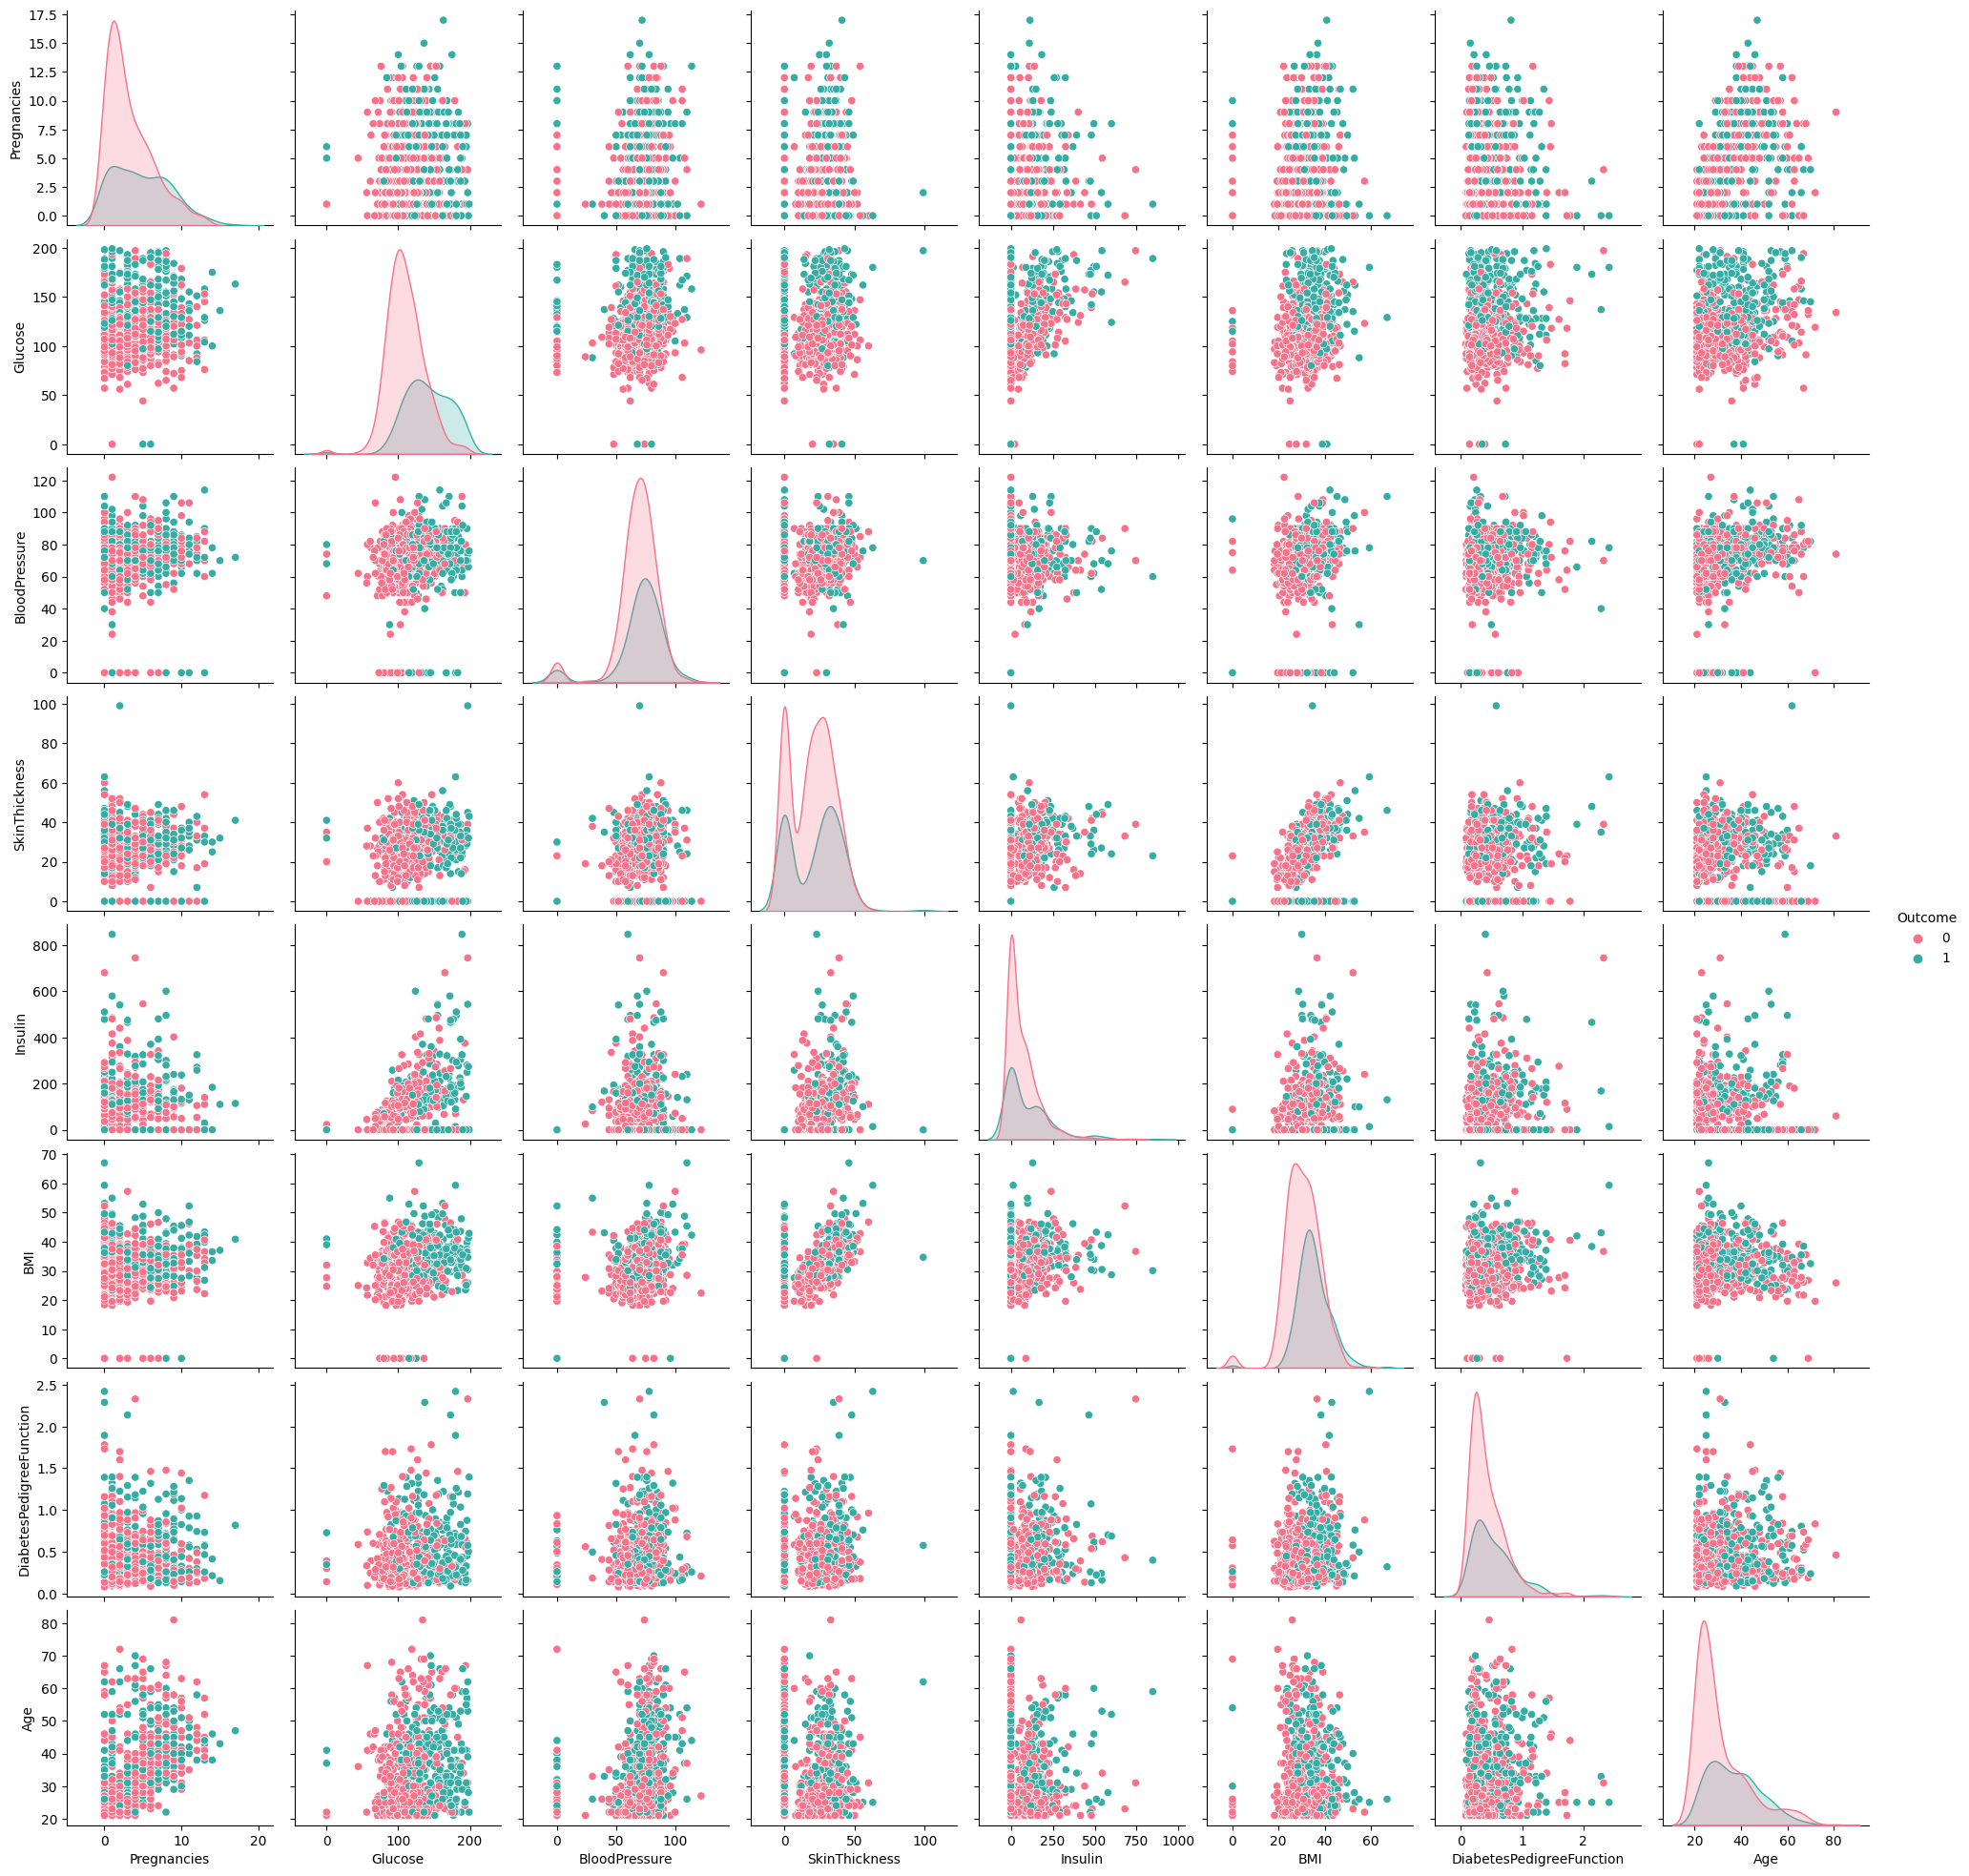

In [8]:
import seaborn as sns
sns.pairplot(df, hue='Outcome', palette="husl")

<h1>Voting Classifier</h1>

<h4> As we can see from the scatter plots, the data is not linearly seperable except BlooodPressure vs Glucose (slightly)</h4>

<h3> Now, let's train some classifiers seperately to have an idea of how each one performs independently</h3>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
clf_lr = LogisticRegression()
clf_knn = KNeighborsClassifier()
clf_rf = RandomForestClassifier()

Since we want to use all 3 with cross validation, lets create a list of these estimators

In [17]:
estimators = [('LR',clf_lr),('KNN',clf_knn),('RF',clf_rf)]

In [23]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy' )
    print(estimator[0],np.round(np.mean(scores),2))

LR 0.77
KNN 0.72
RF 0.77


<h4> Logistic Regression on par with Random Forest</h4>

Note: The data is not preprocessed and hence the scores are not high.

<h3> Let's implement voting classifier</h3>

In [26]:
from sklearn.ensemble import VotingClassifier

In [28]:
# voting - hard
vc = VotingClassifier(estimators=estimators, voting ='hard')
scores = cross_val_score(vc, X, y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(scores),2))

0.77


In [29]:
# voting - soft
vc = VotingClassifier(estimators=estimators, voting ='soft')
scores = cross_val_score(vc, X, y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(scores),2))

0.75


<h4> In this case hard voting outperforms soft voting but is generally not the case.</h4>

<h3> What happens if we use the same algorithm for multiple models</h3>

In [31]:
from sklearn.svm import SVC

In [33]:
svm = SVC(probability=True, kernel='poly', degree=1)

scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
print('SVM',np.round(np.mean(scores),2))

SVM 0.75


In [34]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy' )
    print(estimator[0],np.round(np.mean(scores),2))

svm1 0.75
svm2 0.77
svm3 0.76
svm4 0.76
svm5 0.75


In [35]:
vc_svm = VotingClassifier(estimators=estimators, voting='soft')
scores = cross_val_score(vc_svm, X, y, cv=10, scoring='accuracy' )
print(np.round(np.mean(scores),2))

0.76


In [36]:
vc_svm = VotingClassifier(estimators=estimators, voting='hard')
scores = cross_val_score(vc_svm, X, y, cv=10, scoring='accuracy' )
print(np.round(np.mean(scores),2))

0.76


<h3> We see that for this dataset, the voting classifier is not performing better than the models individually</h3>

<h3>Let's check for another dataset in the future</h3>

<h1>Voting Regressor</h1>

In [48]:
from sklearn.datasets import load_boston

In [58]:
X, y = load_boston(return_X_y=True)

In [59]:
X.shape

(506, 13)

In [60]:
y.shape

(506,)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

In [62]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr = SVR()

In [63]:
estimators = [('lr',lr),('dtr',dtr),('svr',svr)]

In [64]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='r2' )
    print(estimator[0],np.round(np.mean(scores),2))

lr 0.2
dtr -0.09
svr -0.41


In [65]:
from sklearn.ensemble import VotingRegressor

In [66]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr, X, y, cv=10, scoring='r2' )
print(np.round(np.mean(scores),2))

0.45
